In [2]:
%matplotlib inline

Analyze Merfish data
========================

This tutorial shows how to apply Squidpy for the analysis of Merfish data.

The data used here was obtained from {cite}`Moffitt2018-me`.
We provide a pre-processed subset of the data, in {class}`anndata.AnnData` format.
For details on how it was pre-processed, please refer to the original paper.


Import packages & data
----------------------
To run the notebook locally, create a conda environment as *conda env create -f environment.yml* using this
`environment.yml <https://github.com/scverse/squidpy_notebooks/blob/main/environment.yml>`_.

In [ ]:
#First Run Setup

# !pip install scanpy
# !pip install squidpy

In [2]:
import scanpy as sc
import squidpy as sq

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

# load the pre-processed dataset
adata = sq.datasets.merfish()
adata

squidpy==1.6.5


AnnData object with n_obs × n_vars = 73655 × 161
    obs: 'Cell_ID', 'Animal_ID', 'Animal_sex', 'Behavior', 'Bregma', 'Centroid_X', 'Centroid_Y', 'Cell_class', 'Neuron_cluster_ID', 'batch'
    uns: 'Cell_class_colors'
    obsm: 'spatial', 'spatial3d'

# Different Features of the AnnData Object

| Component | Rows - cells (n\_obs) | Columns - genes (n\_vars) | Description                  |
| --------- | ------------- | ----------------- | ---------------------------- |
| `X`       | ✔             | ✔                 | Main data matrix             |
| `obs`     | ✔             | –                 | Per-cell metadata            |
| `var`     | –             | ✔                 | Per-gene metadata            |
| `obsm`    | ✔             | variable          | Cell embeddings (e.g., UMAP) |
| `varm`    | variable      | ✔                 | Gene embeddings/loadings     |
| `layers`  | ✔             | ✔                 | Alternate matrices           |
| `uns`     | –             | –                 | Arbitrary metadata           |


This datasets consists of consecutive slices from the mouse hypothalamic preoptic region.
It represents an interesting example of how to work with 3D spatial data in Squidpy.
Let's start with visualization: we can either visualize the 3D stack of slides
using {func}`scanpy.pl.embedding`:

In [50]:
import pandas as pd
#from Ipython.display import display

PandaTable=pd.DataFrame(
    adata.X[:10, :10].toarray() if hasattr(adata.X, "toarray") else adata.X[:10, :10],
    index=adata.obs_names[:10],
    columns=adata.var_names[:10]
)

display(PandaTable.head(5))

print(f"number of cells: {adata.n_obs}")
print(f"Metadata columns for each cell:\n",adata.obs.columns.tolist())
display(adata.obs.head(50))

Ace2  Adora2a   Aldh1l1     Amigo2  Ano3      Aqp4        Ar  \
67146-0   0.0      0.0  0.000000   0.000000   0.0  0.000000  0.000000   
67147-0   0.0      0.0  0.000000   0.000000   0.0  0.000000  5.715062   
67148-0   0.0      0.0  0.629596  40.295242   0.0  1.888817  1.888817   
67149-0   0.0      0.0  0.000000   3.998158   0.0  0.000000  0.000000   
67150-0   0.0      0.0  0.000000   0.000000   0.0  0.000000  0.000000   

         Arhgap36    Avpr1a  Avpr2  
67146-0  0.000000  0.000000    0.0  
67147-0  2.857536  0.000000    0.0  
67148-0  1.888817  1.259228    0.0  
67149-0  3.998158  0.000000    0.0  
67150-0  0.000000  0.000000    0.0

number of cells: 73655
Metadata columns for each cell:
 ['Cell_ID', 'Animal_ID', 'Animal_sex', 'Behavior', 'Bregma', 'Centroid_X', 'Centroid_Y', 'Cell_class', 'Neuron_cluster_ID', 'batch']


Cell_ID  Animal_ID Animal_sex Behavior  \
67146-0  6d6b1d59-6f3b-4a9d-b5a4-8c8b073ae025          1     Female    Naive   
67147-0  76200644-c14a-4cfa-8752-2a02e5f10d20          1     Female    Naive   
67148-0  6b08ca36-b395-415a-bb34-d7b67550c35d          1     Female    Naive   
67149-0  b9cb9cfb-fff7-426e-8c36-18fe428ca156          1     Female    Naive   
67150-0  982cc0fc-6d11-4dc4-9ffc-c8c0cee48e6d          1     Female    Naive   
67151-0  ee13ce4c-adf8-4602-9a21-23fdf91d28e0          1     Female    Naive   
67152-0  c11c3702-8987-4062-8962-0a8db718a7ec          1     Female    Naive   
67153-0  008c0303-4989-4837-aeb1-2bae3ce57ff0          1     Female    Naive   
67154-0  c1c47b50-f630-47ff-82ec-b1b949ee8d23          1     Female    Naive   
67155-0  7b048efd-73bb-4c43-a2e0-8d0ccee0fc8a          1     Female    Naive   
67156-0  7d8ecd5b-b01a-4226-b98c-351799915158          1     Female    Naive   
67157-0  41205c7a-60fe-47c3-bdd4-198e7c2d94fa          1     Female    Naive   
67158-0  627a29e2-3cd0-48a7-969e-76f5c7855819          1     Female    Naive   
67159-0  8ece978a-3d77-4bf8-ba69-96317d64bfd6          1     Female    Naive   
67160-0  9c716dce-ef92-45c2-89b0-13a0711eccdc          1     Female    Naive   
67161-0  3649a871-e9f7-45d3-b0fd-670c8644507a          1     Female    Naive   
67162-0  1baf79d2-f1b7-4a58-9336-1d861cdfd41d          1     Female    Naive   
67163-0  35eeebf7-e836-4a13-84e7-b5c7f331302d          1     Female    Naive   
67164-0  32f81758-0fc9-4258-8f3a-dfe6ff9ccd6b          1     Female    Naive   
67165-0  0b1c95bc-d800-4d7a-835b-b0b8bf90942d          1     Female    Naive   
67166-0  208302cf-cfc5-4c7d-a483-c0eaa5dbf134          1     Female    Naive   
67167-0  4d8f8aa2-6dcf-431e-ae84-0b6a63f6eba2          1     Female    Naive   
67168-0  151b0d90-4ab6-4977-892e-216b6c9a36df          1     Female    Naive   
67169-0  3546c2cd-836b-492c-a45f-4548782c4018          1     Female    Naive   
67170-0  7aaacd01-e68e-431e-aa59-9396819c0f63          1     Female    Naive   
67171-0  6ec14338-8060-43a9-a250-96dcce8a7922          1     Female    Naive   
67172-0  fc1ec282-d52b-4172-804d-90c87c567b96          1     Female    Naive   
67173-0  1ccab41e-9dfd-4d38-b57d-b0999b388ce1          1     Female    Naive   
67174-0  ee9bc769-8d7f-44cd-8032-f22586f550d1          1     Female    Naive   
67175-0  2d791510-8b54-407a-90c6-a7ac8e01c819          1     Female    Naive   
67176-0  3e8b3026-d9c4-4f00-8d72-aaf5b21ddbe6          1     Female    Naive   
67177-0  013f2667-a83f-44b9-a5d4-64e4d925f9f1          1     Female    Naive   
67178-0  e7a52707-1954-442e-8e36-2cd082a8ce25          1     Female    Naive   
67179-0  dfbf1f48-bdc3-41d8-908e-395fb0de5b23          1     Female    Naive   
67180-0  3d0d81bf-4747-40c1-a212-e192524d4c4d          1     Female    Naive   
67181-0  a42f46df-4527-402b-873b-115a0b2aebb3          1     Female    Naive   
67182-0  043abde9-f4c5-44e4-b219-829ee6ea6583          1     Female    Naive   
67183-0  a40a2f7f-50c8-4526-9be0-0ecae61d8711          1     Female    Naive   
67184-0  7320a328-21b2-4c7d-81ad-fc3123b6cb49          1     Female    Naive   
67185-0  2422b318-b764-4f71-b389-8105ab39c91c          1     Female    Naive   
67186-0  cdca44ae-9775-4c2e-b79b-a795605fe503          1     Female    Naive   
67187-0  171478ca-8e34-44d6-9153-6983d13ce4a8          1     Female    Naive   
67188-0  ecf9c88c-f765-4043-b1b4-cc7a8ce6e927          1     Female    Naive   
67189-0  87695ff0-22a2-4f2b-af74-e08342a1fe54          1     Female    Naive   
67190-0  ce8bc7f2-25b8-414c-8448-3c2fcd3ea729          1     Female    Naive   
67191-0  b17e06fa-b6ba-4059-888a-3b72312788fc          1     Female    Naive   
67192-0  b740a757-2556-4635-a826-eb5348413436          1     Female    Naive   
67193-0  42c3ea92-a9e3-4393-845a-df15591d8a06          1     Female    Naive   
67194-0  14167a0e-bd6d-4f27-bd43-34d212605c13          1     Female    Naive   
67195-0  589ade20-efcb-4529-95f7-ecd3f

In [ ]:
# Function to print out all data from a particular cell in the data table

def get_anndata_value_info(adata, cell_name, gene_name):
    """
    Retrieve the expression value, cell metadata, and gene metadata from an AnnData object.

    Parameters:
    - adata: AnnData object
    - cell_name: str, name of the cell (must be in adata.obs_names)
    - gene_name: str, name of the gene (must be in adata.var_names)

    Returns:
    - dict with expression value, cell metadata (pandas Series), and gene metadata (pandas Series)
    """
    if cell_name not in adata.obs_names:
        raise ValueError(f"Cell '{cell_name}' not found in adata.obs_names")
    if gene_name not in adata.var_names:
        raise ValueError(f"Gene '{gene_name}' not found in adata.var_names")

    # Get expression value
    val = adata[cell_name, gene_name].X
    if hasattr(val, "toarray"):
        val = val.toarray()[0, 0]
    else:
        val = val[0, 0]

    # Get metadata
    cell_meta = adata.obs.loc[cell_name]
    gene_meta = adata.var.loc[gene_name]

    return {
        "expression_value": val,
        "cell_metadata": cell_meta,
        "gene_metadata": gene_meta
    }

In [7]:
result = get_anndata_value_info(adata, "67148-0", "Amigo2")

print("Expression value:", result["expression_value"])
print("\nCell metadata:\n", result["cell_metadata"])
print("\nGene metadata:\n", result["gene_metadata"])

result = get_anndata_value_info(adata, "67155-0", "Ar")

print("Expression value:", result["expression_value"])
print("\nCell metadata:\n", result["cell_metadata"])
print("\nGene metadata:\n", result["gene_metadata"])

Expression value: 40.295242

Cell metadata:
 Cell_ID              6b08ca36-b395-415a-bb34-d7b67550c35d
Animal_ID                                               1
Animal_sex                                         Female
Behavior                                            Naive
Bregma                                              -29.0
Centroid_X                                     523.114231
Centroid_Y                                   -3992.774432
Cell_class                                     Inhibitory
Neuron_cluster_ID                                     I-7
batch                                                   0
Name: 67148-0, dtype: object

Gene metadata:
 Series([], Name: Amigo2, dtype: float64)
Expression value: 1.3563511

Cell metadata:
 Cell_ID              7b048efd-73bb-4c43-a2e0-8d0ccee0fc8a
Animal_ID                                               1
Animal_sex                                         Female
Behavior                                            Naive
Bregma     

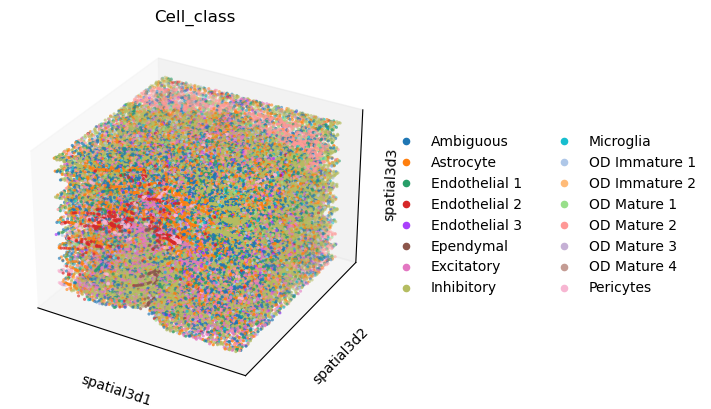

In [9]:
sc.pl.embedding(adata, basis="spatial3d", projection="3d", color="Cell_class")

# squidpy.pl.spatial_scatter

Or visualize a single slide with {func}`squidpy.pl.spatial_scatter`. Here the slide identifier
is stored in `adata.obs["Bregma"]`, see original paper for definition.

Visualize 2d plane of spatial cellular data. Does not support true 3d images. Basically XY coordinates.

# sq.pl.spatial_scatter
    adata: AnnData
    color: Optional[str] = None
    basis: str = "spatial"
    img_key: Optional[str] = None
    library_id: Optional[str] = None
    size: Optional[float] = None
    alpha: float = 1.0
    **kwargs






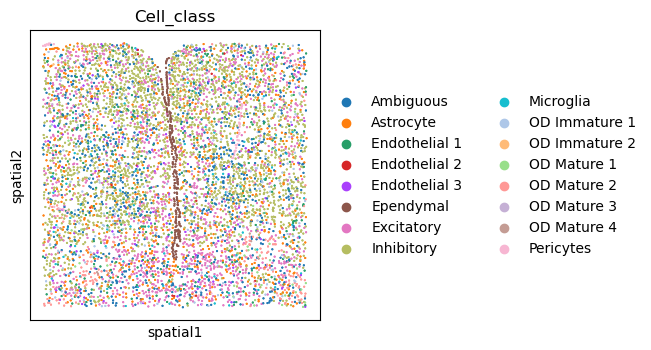

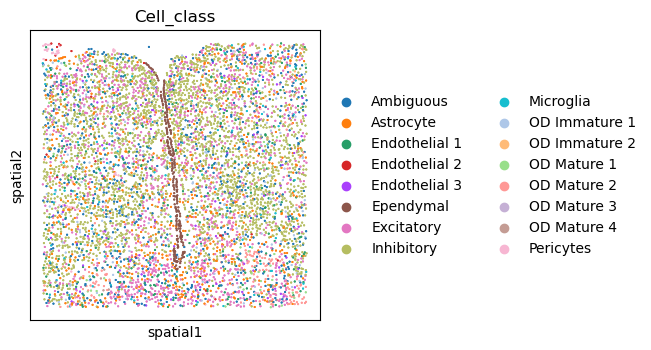

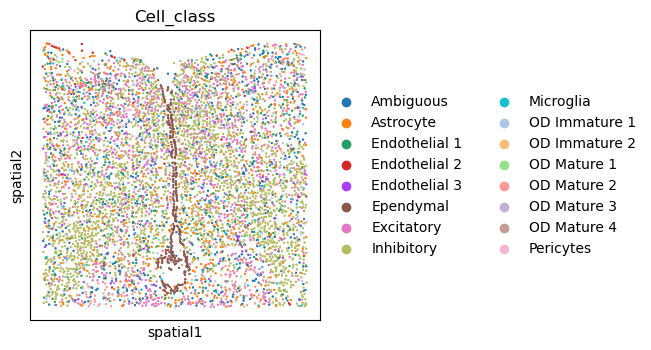

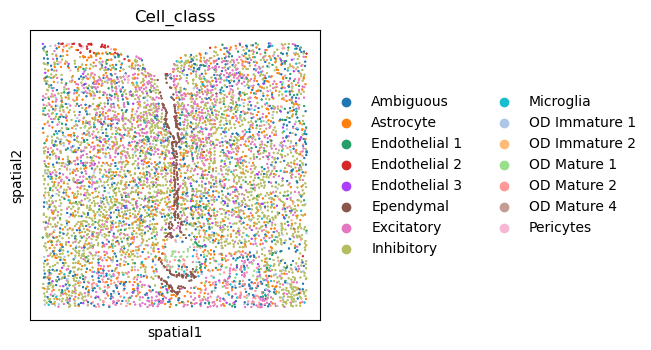

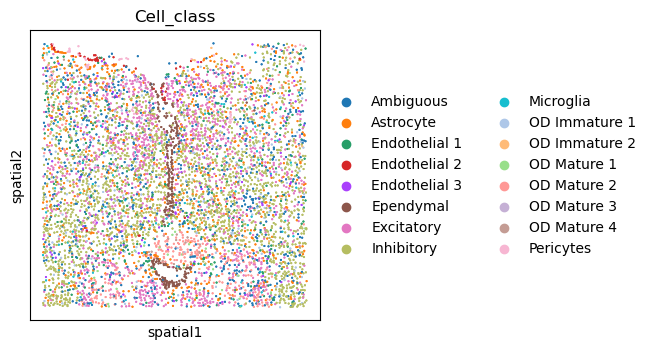

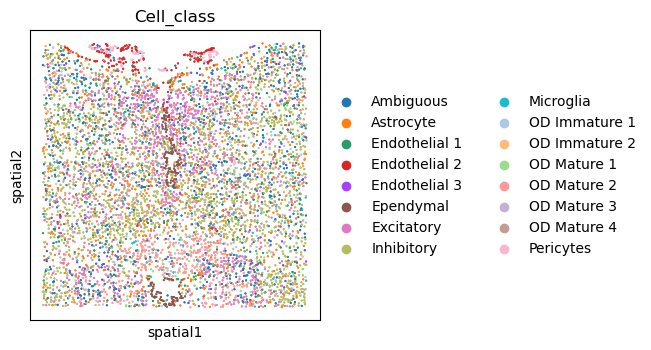

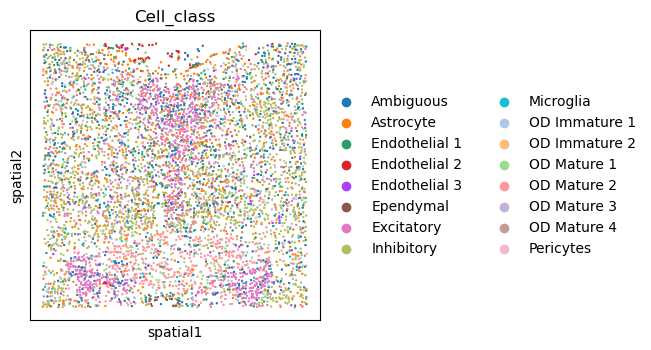

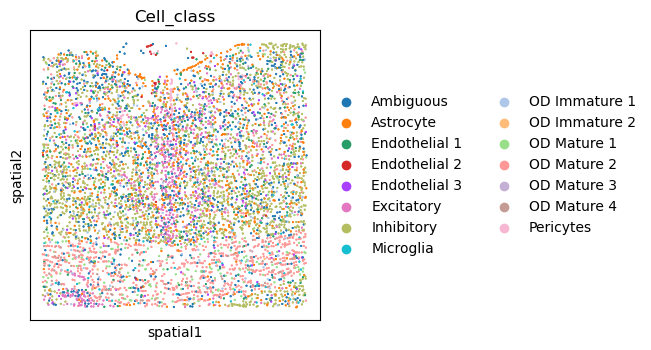

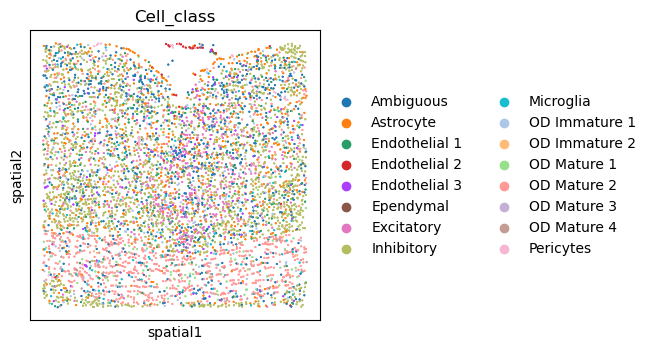

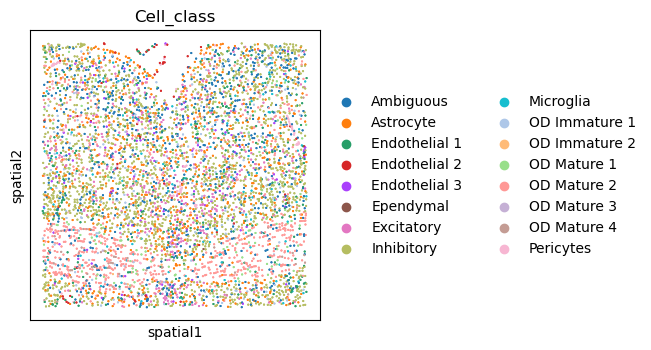

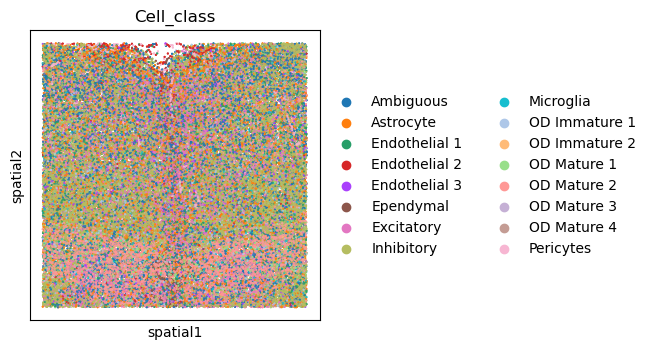

In [110]:
import warnings
warnings.filterwarnings("ignore")
sq.pl.spatial_scatter(
    adata[adata.obs.Bregma == -24], shape=None, color="Cell_class", size=1
)
sq.pl.spatial_scatter(
    adata[adata.obs.Bregma == -19], shape=None, color="Cell_class", size=1
)
sq.pl.spatial_scatter(
    adata[adata.obs.Bregma == -9], shape=None, color="Cell_class", size=1
)
sq.pl.spatial_scatter(
    adata[adata.obs.Bregma == -4], shape=None, color="Cell_class", size=1
)
sq.pl.spatial_scatter(
    adata[adata.obs.Bregma == 1], shape=None, color="Cell_class", size=1
)
sq.pl.spatial_scatter(
    adata[adata.obs.Bregma == 6], shape=None, color="Cell_class", size=1
)
sq.pl.spatial_scatter(
    adata[adata.obs.Bregma == 11], shape=None, color="Cell_class", size=1
)
sq.pl.spatial_scatter(
    adata[adata.obs.Bregma == 16], shape=None, color="Cell_class", size=1
)
sq.pl.spatial_scatter(
    adata[adata.obs.Bregma == 21], shape=None, color="Cell_class", size=1
)
sq.pl.spatial_scatter(
    adata[adata.obs.Bregma == 26], shape=None, color="Cell_class", size=1
)
sq.pl.spatial_scatter(
    adata[adata.obs.Bregma != 100], shape=None, color="Cell_class", size=1
)


#Known Begmas: -24,-19,-9,-4,1, 6, 11, 16, 21, 26 

Neighborhood enrichment analysis in 3D
--------------------------------------
It is important to consider whether the analysis should be performed on the 3D
spatial coordinates or the 2D coordinates for a single slice. Functions that
make use of the spatial graph can already support 3D coordinates, but it is important
to consider that the z-stack coordinate is in the same unit metrics as the x, y coordinates.
Let's start with the neighborhood enrichment score. You can read more on the function
in the docs at {doc}`../examples/graph/compute_spatial_neighbors`.
First, we need to compute a neighbor graph with {func}`squidpy.gr.spatial_neighbors`.
If we want to compute the neighbor graph on the 3D coordinate space,
we need to specify ``spatial_key = "spatial3d"``.
Then we can use {func}`squidpy.gr.nhood_enrichment` to compute the score, and visualize
it with {func}`squidpy.pl.nhood_enrichment`.

### sq.gr.spatial_neighbors

| Parameter     | Description                                                                                             |
| ------------- | ------------------------------------------------------------------------------------------------------- |
| `adata`       | Your `AnnData` object with `.obsm["spatial"]` coordinates.                                              |
| `coord_type`  | `'grid'` for structured data (e.g., Visium), `'generic'` for unstructured spatial data (e.g., seqFISH). |
| `n_neigh`     | Number of nearest neighbors to connect (used with `coord_type="generic"`).                              |
| `radius`      | Distance threshold to define neighbors (alternative to `n_neigh`).                                      |
| `delaunay`    | If `True`, computes a Delaunay triangulation-based graph (for generic data).                            |
| `key_added`   | Custom name for storing the graph in `adata.obsp`. Default is `'spatial_connectivities'`.               |
| `library_id`  | For multi-sample datasets (Visium-style).                                                               |
| `spatial_key` | Which key in `.obsm` to use for spatial coordinates (usually `"spatial"`).                              |

sq.gr.spatial_neighbors(
    adata: AnnData,
    coord_type: str = "grid",
    n_neigh: Optional[int] = None,
    radius: Optional[float] = None,
    key_added: Optional[str] = None,
    delaunay: bool = False,
    library_id: Optional[str] = None,
    spatial_key: str = "spatial"
)

### Outputs
| Location in `adata` | Key                        | Type          | Description                                                                        |
| ------------------- | -------------------------- | ------------- | ---------------------------------------------------------------------------------- |
| `adata.obsp`        | `'spatial_connectivities'` | sparse matrix | Adjacency matrix of the spatial graph (who is connected to whom, weighted)         |
| `adata.obsp`        | `'spatial_distances'`      | sparse matrix | Pairwise Euclidean distances between connected neighbors                           |
| `adata.uns`         | `'spatial_neighbors'`      | dict          | Metadata and indices used to construct the graph (neighbor list, parameters, etc.) |

### sq.gr.nhood_enrichment

It uses the spatial neighbor graph (generated by sq.gr.spatial_neighbors) and a clustering/cell type label (e.g., "Cell_class" or "louvain") to: 
* Count how often each cell type is found near other cell types.
* Compare this to what would be expected by random chance using permutations.
* Compute a Z-score for each pair of cell types indicating:
* Positive Z-score: spatial co-enrichment (they occur near each other more than expected).
* Negative Z-score: spatial exclusion (they avoid each other).
* Near 0: no significant spatial interaction.

| Parameter     | Description                                                    |
| ------------- | -------------------------------------------------------------- |
| `adata`       | The `AnnData` object (must have spatial neighbors precomputed) |
| `cluster_key` | The column in `adata.obs` with cluster/cell-type labels        |
| `n_perms`     | Number of permutations for null distribution (default 1000)    |
| `n_jobs`      | Number of CPU cores to use for parallel processing             |
| `seed`        | Random seed for reproducibility                                |

sq.gr.nhood_enrichment(adata, cluster_key, n_perms=1000, n_jobs=1, seed=None)

### Output 

adata.uns["nhood_enrichment"]



In [137]:
sq.gr.spatial_neighbors(adata, coord_type="generic", spatial_key="spatial3d")

# Shape of the graph
adata.obsp["spatial_connectivities"].shape

# Number of neighbors for a cell
adata.obsp["spatial_connectivities"][0].nnz

# Parameters used to build the graph
adata.uns["spatial_neighbors"]["params"]

"nhood_enrichment" in adata.uns
#adata.uns["nhood_enrichment"]["zscore"]
# # View neighbor indices for first 5 cells
# adata.uns["spatial_neighbors"]["indices"][:5]

False

  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

TypeError: tuple indices must be integers or slices, not str

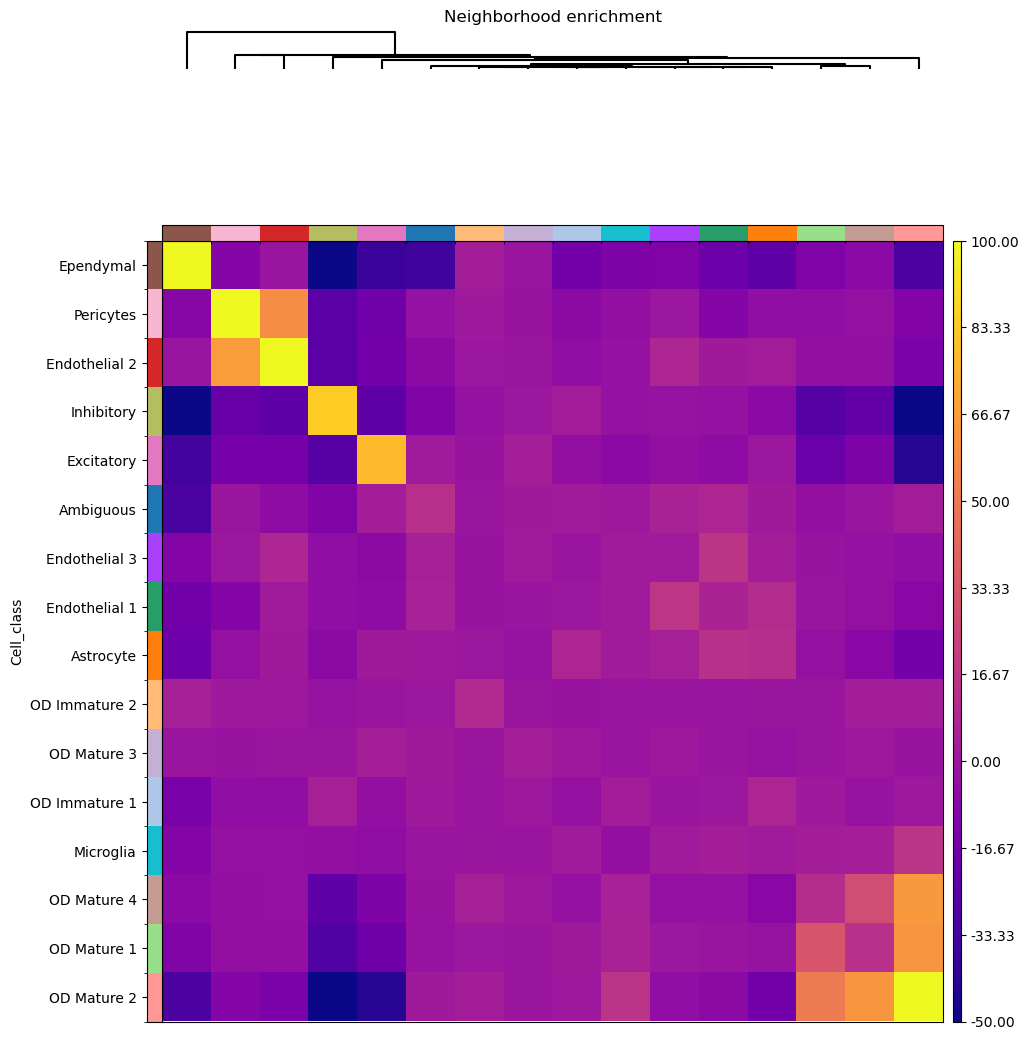

In [139]:
import pandas as pd

sq.gr.spatial_neighbors(adata, coord_type="generic", spatial_key="spatial3d")
sq.gr.nhood_enrichment(adata, cluster_key="Cell_class")
sq.pl.nhood_enrichment(
    adata, cluster_key="Cell_class", method="single", cmap="plasma", vmin=-50, vmax=100
)



We can visualize some of the co-enriched clusters with {func}`scanpy.pl.embedding`.
We will set `na_colors=(1,1,1,0)` to make transparent the other observations,
in order to better visualize the clusters of interests across z-stacks.

| Parameter    | Description                                                 |
| ------------ | ----------------------------------------------------------- |
| `adata`      | Your `AnnData` object                                       |
| `basis`      | The embedding name: e.g., `"umap"`, `"tsne"`, `"pca"`       |
| `color`      | Feature(s) to color by: gene names, `.obs` column, etc.     |
| `title`      | Title for the plot                                          |
| `size`       | Marker size                                                 |
| `alpha`      | Transparency                                                |
| `sort_order` | Plot points in order of color intensity for clearer visuals |
| `legend_loc` | Legend position (e.g., `"on data"`, `"right margin"`)       |
| `**kwargs`   | Passed to `matplotlib.pyplot.scatter`                       |


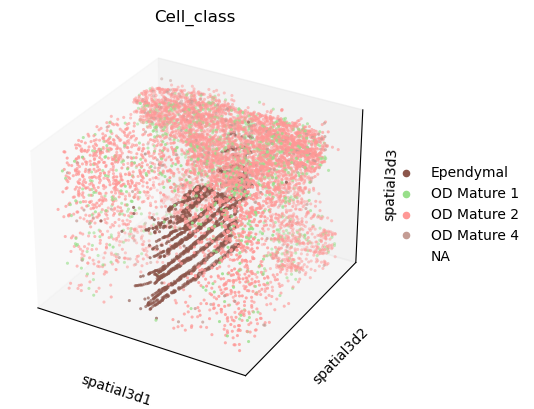

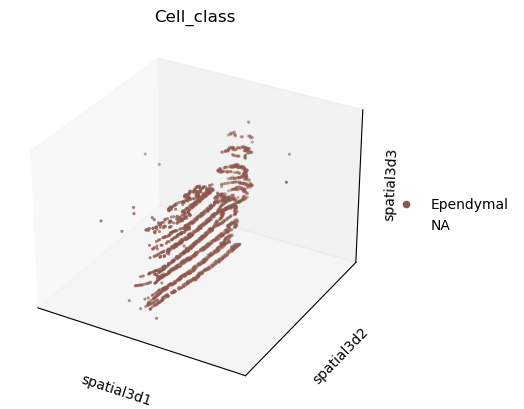

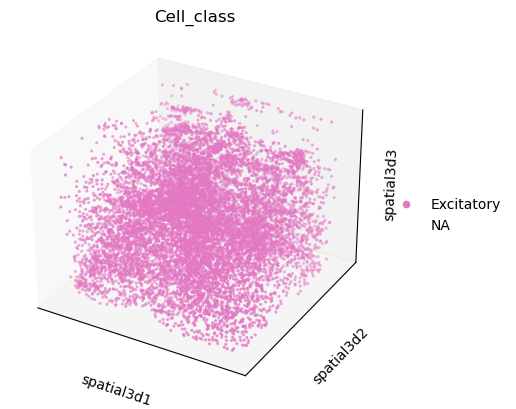

In [116]:
sc.pl.embedding(
    adata,
    basis="spatial3d",
    groups=["OD Mature 1", "OD Mature 2", "OD Mature 4","Ependymal"],
    na_color=(1, 1, 1, 0),
    projection="3d",
    color="Cell_class",
)

sc.pl.embedding(
    adata,
    basis="spatial3d",
    groups=["Ependymal"],
    na_color=(1, 1, 1, 0),
    projection="3d",
    color="Cell_class",
)

sc.pl.embedding(
    adata,
    basis="spatial3d",
    groups=["Excitatory"],
    na_color=(1, 1, 1, 0),
    projection="3d",
    color="Cell_class",
)

We can also visualize gene expression in 3D coordinates. Let's perform differential
expression testing with {func}`scanpy.tl.rank_genes_groups` and visualize the results

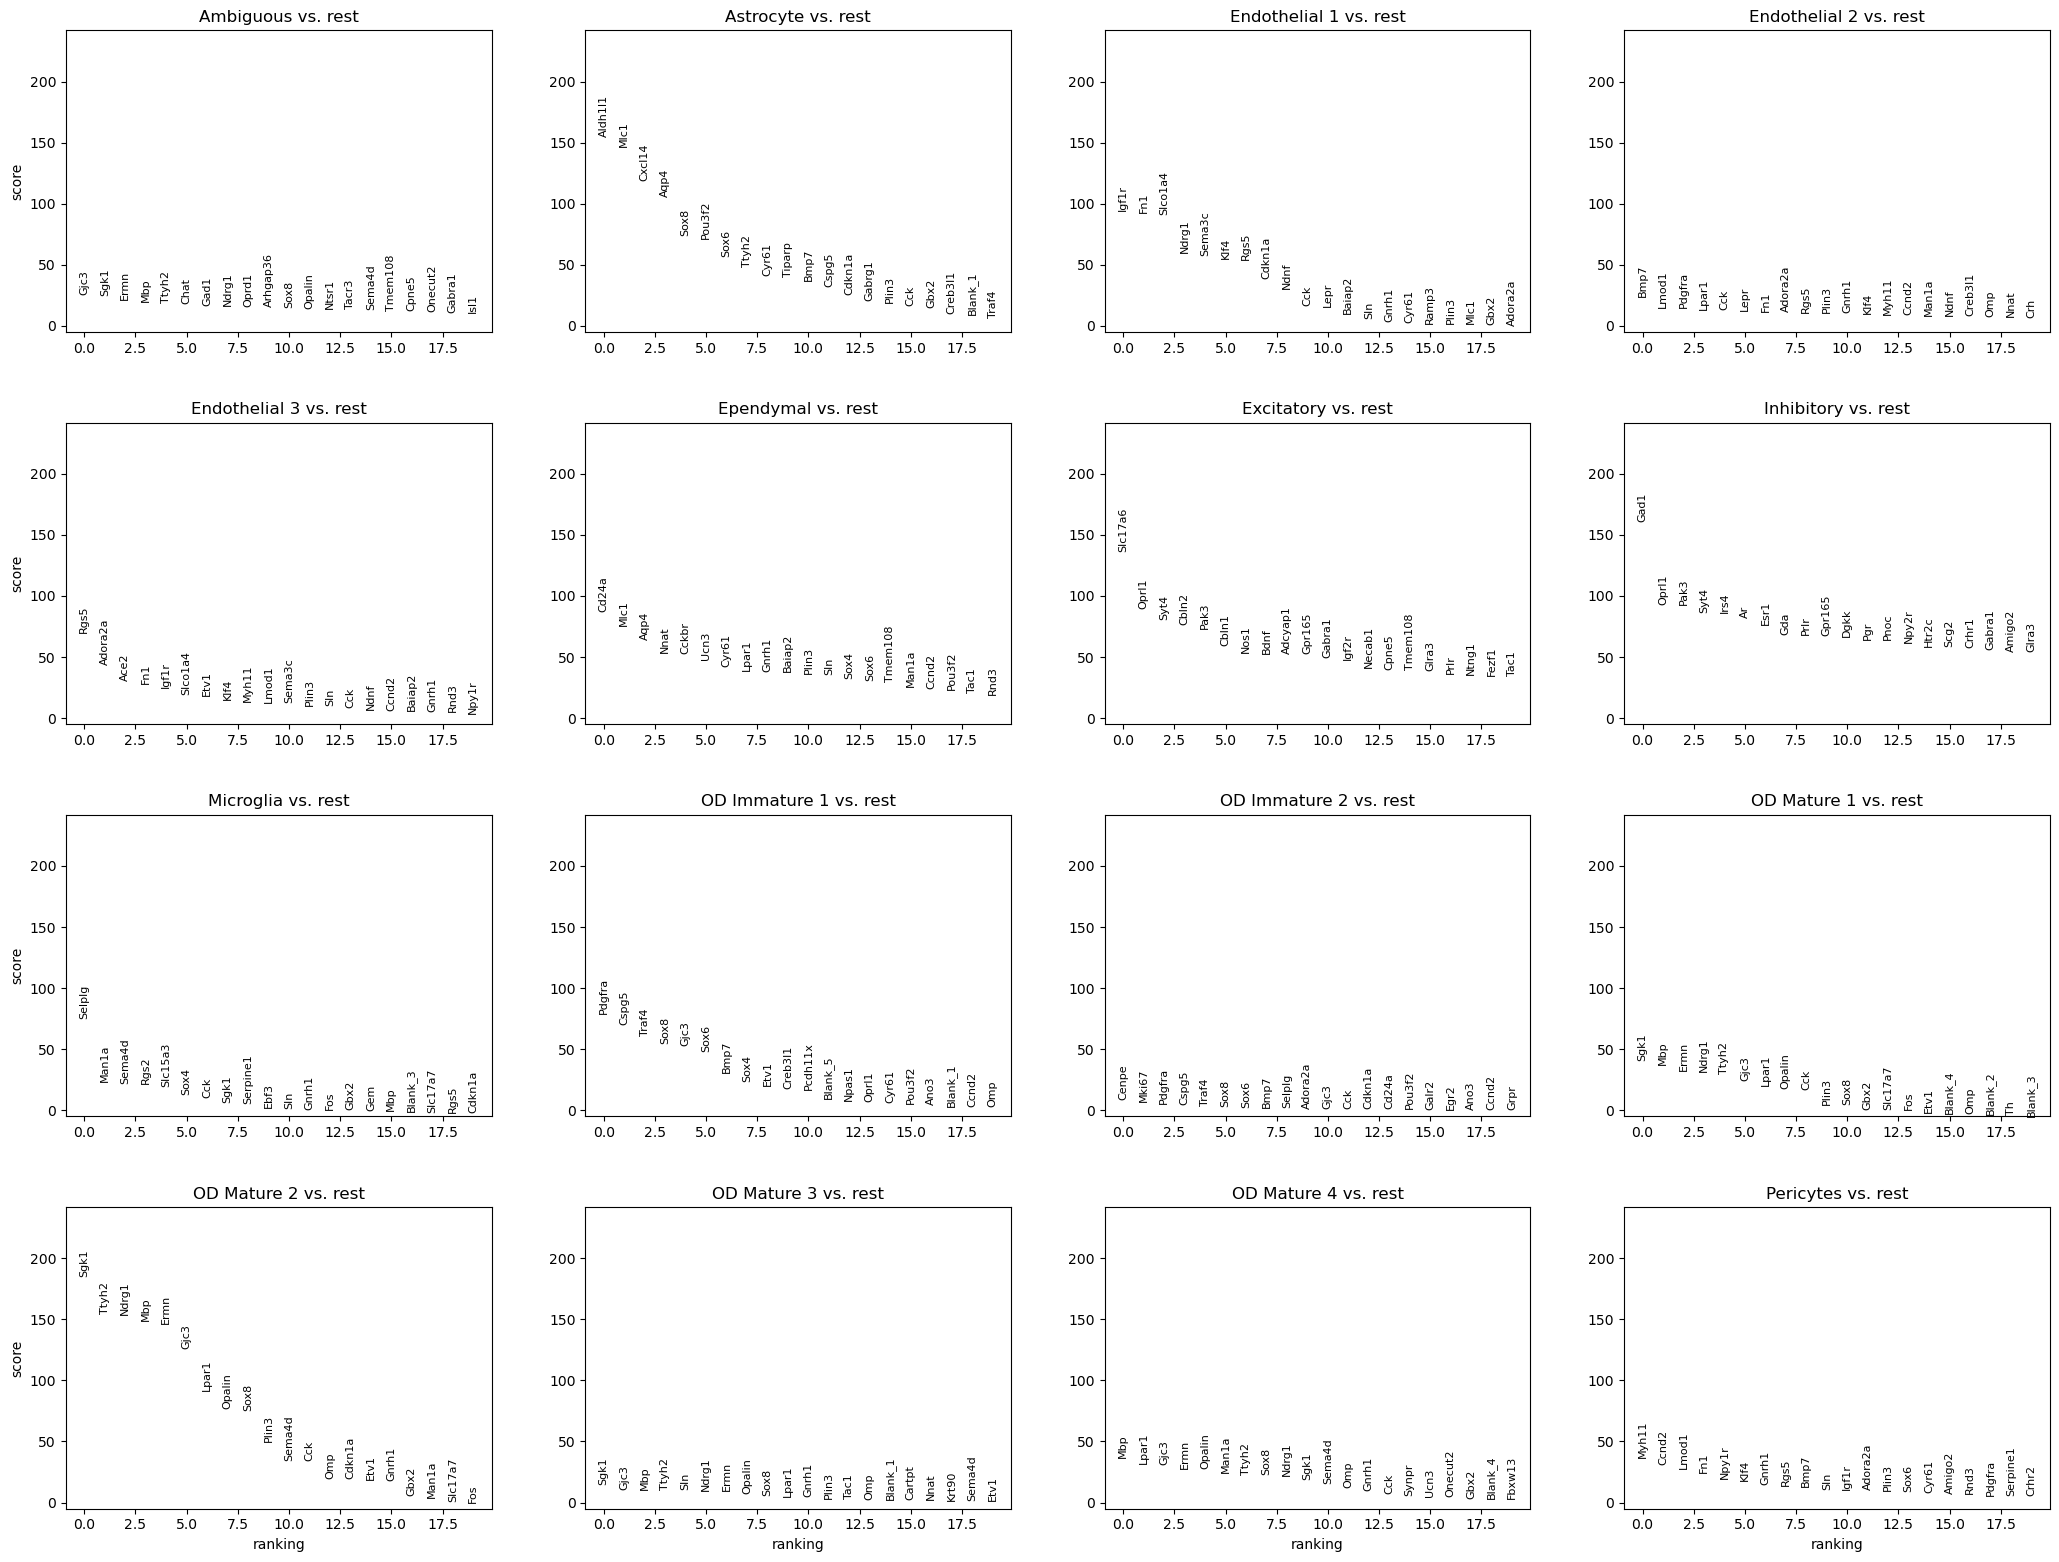

In [8]:
sc.tl.rank_genes_groups(adata, groupby="Cell_class")
sc.pl.rank_genes_groups(adata, groupby="Cell_class")

and the expression in 3D.

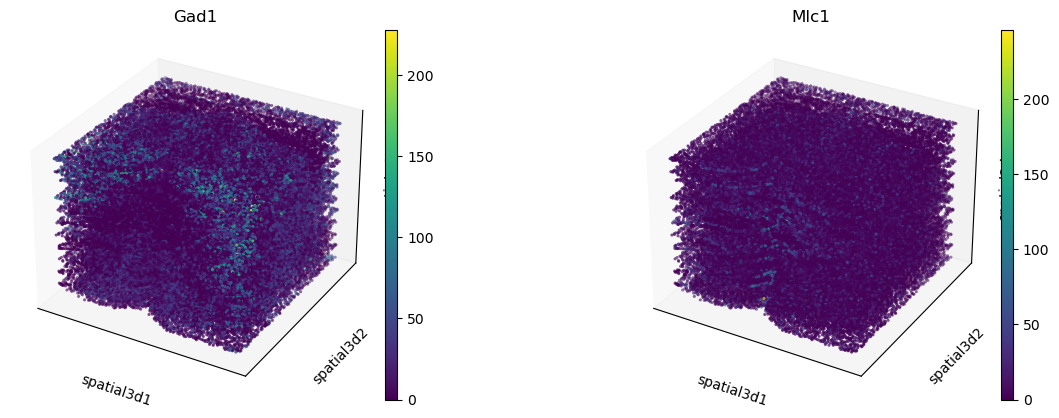

In [9]:
sc.pl.embedding(adata, basis="spatial3d", projection="3d", color=["Gad1", "Mlc1"])

If the same analysis should be performed on a single slice, then it is advisable to
copy the sample of interest in a new {class}`anndata.AnnData` and use it as
a standard 2D spatial data object.

100%|██████████| 1000/1000 [00:11<00:00, 87.51/s]


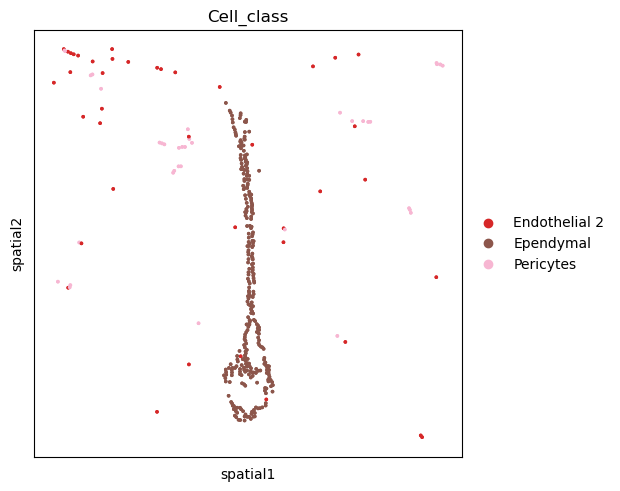

In [10]:
adata_slice = adata[adata.obs.Bregma == -9].copy()
sq.gr.spatial_neighbors(adata_slice, coord_type="generic")
sq.gr.nhood_enrichment(adata, cluster_key="Cell_class")
sq.pl.spatial_scatter(
    adata_slice,
    color="Cell_class",
    shape=None,
    groups=[
        "Ependymal",
        "Pericytes",
        "Endothelial 2",
    ],
    size=10,
)

Spatially variable genes with spatial autocorrelation statistics
----------------------------------------------------------------
With Squidpy we can investigate spatial variability of gene expression.
This is an example of a function that only supports 2D data.
{func}`squidpy.gr.spatial_autocorr` conveniently wraps two
spatial autocorrelation statistics: *Moran's I* and *Geary's C*.
They provide a score on the degree of spatial variability of gene expression.
The statistic as well as the p-value are computed for each gene, and FDR correction
is performed. For the purpose of this tutorial, let's compute the *Moran's I* score.
The results are stored in `adata.uns['moranI']` and we can visualize selected genes
with {func}`squidpy.pl.spatial_scatter`.

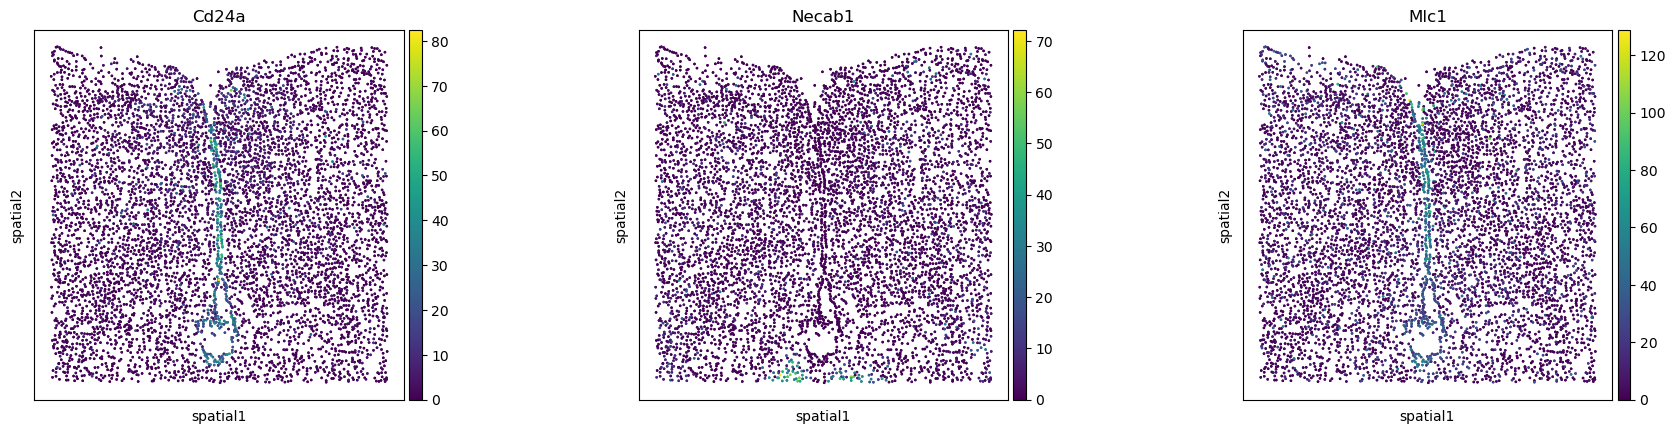

In [11]:
sq.gr.spatial_autocorr(adata_slice, mode="moran")
adata_slice.uns["moranI"].head()
sq.pl.spatial_scatter(
    adata_slice, shape=None, color=["Cd24a", "Necab1", "Mlc1"], size=3
)